In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
from networkx.algorithms import community


In [2]:
raw_data = pd.read_csv('all_data_raw.csv',index_col=0)
raw_data

,简称,日期,开盘价(元),收盘价(元),subsector
代码,,,,,
600030.SH,中信证券,2010-01-04,16.50,16.13,资本市场服务
600030.SH,中信证券,2010-01-05,16.26,16.92,资本市场服务
600030.SH,中信证券,2010-01-06,17.01,16.72,资本市场服务
600030.SH,中信证券,2010-01-07,16.71,16.32,资本市场服务
600030.SH,中信证券,2010-01-08,16.21,16.63,资本市场服务
...,...,...,...,...,...
000563.SZ,陕国投A,2021-01-13,3.59,3.51,其他金融业
000563.SZ,陕国投A,2021-01-14,3.49,3.51,其他金融业
000563.SZ,陕国投A,2021-01-15,3.51,3.52,其他金融业


In [3]:
raw_data['month'] = raw_data.apply(lambda x:x['日期'][:-3],axis=1)
raw_data['year'] = raw_data.apply(lambda x:x['日期'][:-6],axis=1)
raw_data['return'] = np.log(raw_data['收盘价(元)'])-np.log(raw_data['开盘价(元)'])

In [4]:
mutiIndex = list(zip(raw_data['month'],raw_data['简称']))
index = pd.MultiIndex.from_tuples(mutiIndex,names=['month','简称'])
raw_data.set_index(index)
raw_data.to_csv('cleaned_data.csv')

In [21]:
one_month = raw_data[raw_data['month']=='2010-01']
# one_month[one_month['简称']=='中信证券']

In [22]:
pivot_m = pd.pivot_table(data=one_month,values='return',columns='简称',index='日期')
# pivot_m

In [23]:
corr=pivot_m.corr()
corr

简称,*ST安信,*ST熊猫,东北证券,东方能源,中信证券,中信银行,中国人寿,中国太保,中国平安,中国银行,...,绿庭B股,绿庭投资,西南证券,西水股份,西部资源,越秀金控,锦龙股份,长江证券,陕国投A,鲁信创投
简称,,,,,,,,,,,,,,,,,,,,,
*ST安信,1.000000,0.325059,0.405523,0.314980,0.291197,-0.016028,0.296401,0.262179,0.260146,0.080464,...,0.288475,0.419604,0.435011,0.173136,0.115259,0.309413,0.301852,0.325053,0.464948,0.155142
*ST熊猫,0.325059,1.000000,0.595011,0.570191,0.382819,0.351789,0.409331,0.434080,0.468836,0.182165,...,0.270391,0.654006,0.531592,0.357286,0.098057,0.437558,0.588793,0.285254,0.299146,0.056385
东北证券,0.405523,0.595011,1.000000,0.607007,0.845939,0.502082,0.777770,0.811142,0.682916,0.565868,...,0.625648,0.593213,0.942995,0.486801,0.461694,0.420236,0.806522,0.893445,0.449769,0.118999
东方能源,0.314980,0.570191,0.607007,1.000000,0.581920,0.193342,0.491642,0.500802,0.462743,0.290119,...,0.283756,0.506681,0.711445,0.586413,0.043544,0.671734,0.710692,0.512324,0.500995,0.572040
中信证券,0.291197,0.382819,0.845939,0.581920,1.000000,0.602526,0.821454,0.805068,0.778052,0.793882,...,0.605266,0.527368,0.875879,0.597764,0.323310,0.460999,0.784607,0.851470,0.506493,0.385825
中信银行,-0.016028,0.351789,0.502082,0.193342,0.602526,1.000000,0.782818,0.747911,0.802870,0.887698,...,0.389660,0.365319,0.524719,0.260283,0.200551,0.184258,0.584555,0.525429,0.385782,0.095607
中国人寿,0.296401,0.409331,0.777770,0.491642,0.821454,0.782818,1.000000,0.928927,0.934420,0.853551,...,0.584140,0.561087,0.791706,0.379185,0.294507,0.414234,0.805820,0.722956,0.628581,0.179953
中国太保,0.262179,0.434080,0.811142,0.500802,0.805068,0.747911,0.928927,1.000000,0.915826,0.799865,...,0.501520,0.471986,0.849976,0.377948,0.304342,0.377225,0.805917,0.759171,0.596554,0.244297
中国平安,0.260146,0.468836,0.682916,0.462743,0.778052,0.802870,0.934420,0.915826,1.000000,0.830974,...,0.472527,0.554661,0.729491,0.354581,0.235725,0.387414,0.781714,0.613793,0.684164,0.259058


In [24]:
print(sum(np.sum(corr.isna())))

232


In [25]:
distance_m = np.sqrt(2*(1-corr))
# distance_m

In [30]:
zipped = []
for i in range(len(distance_m.columns)):
    zipped.append(list(zip([distance_m.columns[i]]*distance_m.shape[0],distance_m.index,distance_m[distance_m.columns[i]])))
List_flat = []
for i in zipped:
    for j in i:
        # print(j)
        # print(type(j[2]))
        if not np.isnan(j[2]):
            # print(j[2])
            List_flat.append(j)
s_List_flat = list(set(List_flat))
G = nx.Graph()
node_list = list([x for x,y,z in s_List_flat])
for i in range(len(node_list)):
    G.add_node(node_list[i])
G.add_weighted_edges_from(s_List_flat)

In [31]:
print(nx.number_of_edges(G))
print(nx.number_of_nodes(G))

1653
57


In [32]:
mst = nx.minimum_spanning_tree(G=G)

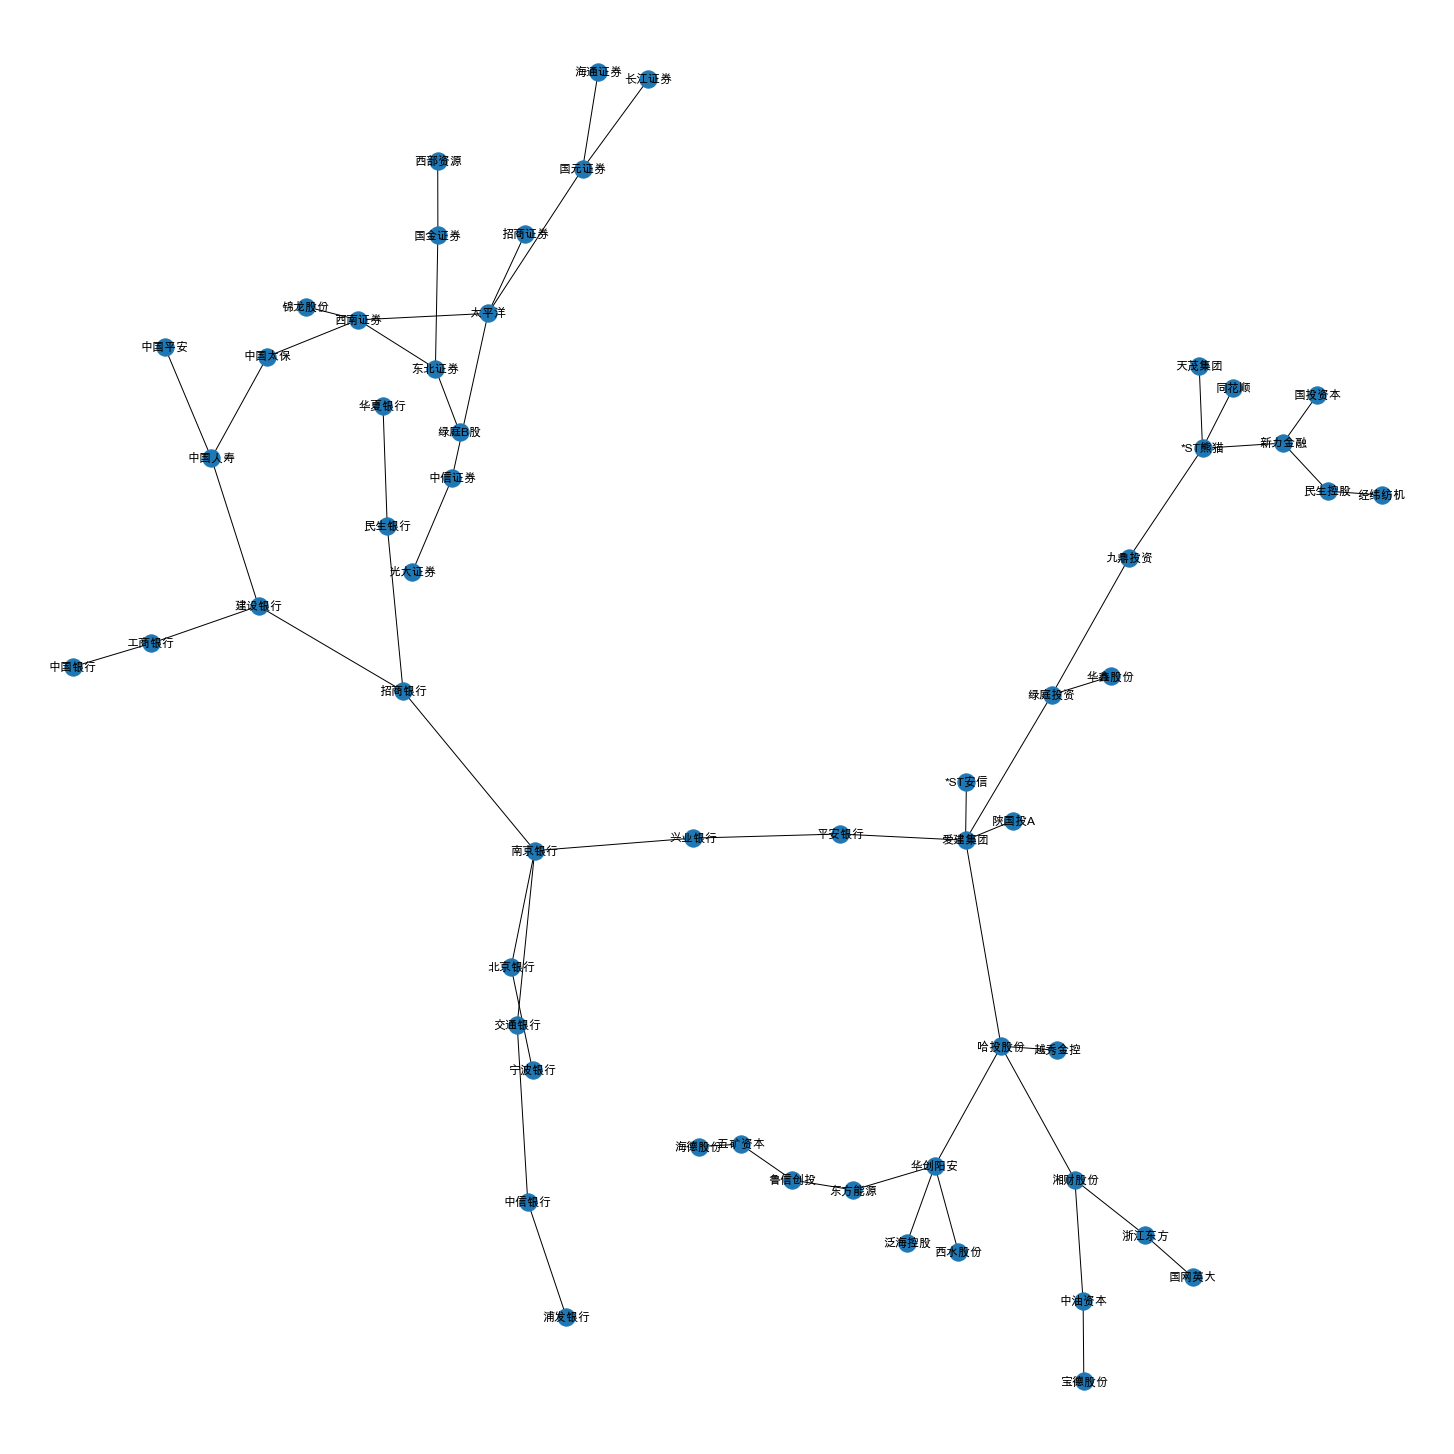

In [33]:
plt.figure(figsize=(20,20))

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
nx.draw_spring(mst,with_labels=True,)

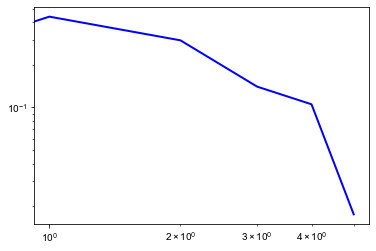

In [34]:
degree =  nx.degree_histogram(mst)          
x = range(len(degree))                             
y = [z / float(sum(degree)) for z in degree] 
plt.loglog(x,y,color="blue",linewidth=2)          
plt.show()                                                          

In [35]:
communities_generator = community.girvan_newman(mst)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
color_c = sorted(map(sorted, next_level_communities))
print(len(color_c))

3


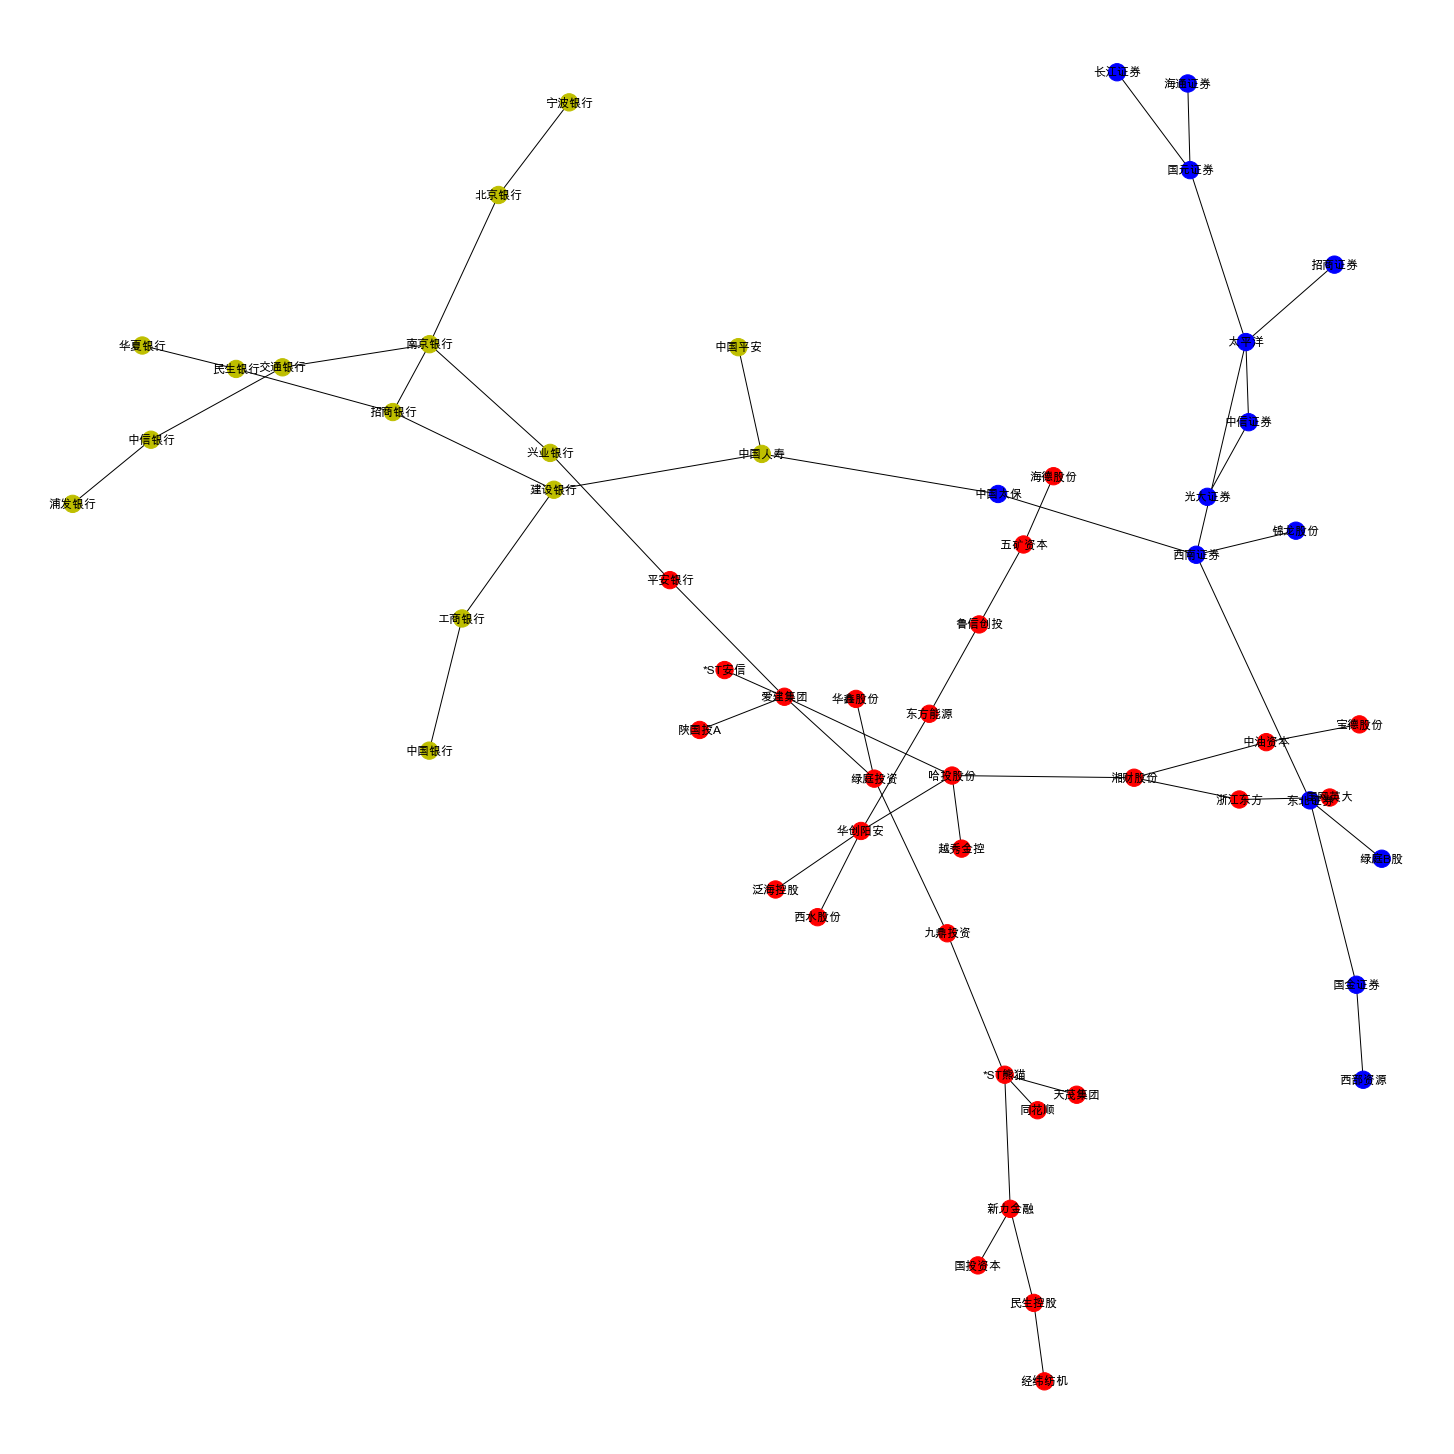

In [36]:
color = ['red','blue','yellow']
color_map = []
for node in mst:
    # print(node)
    if node in color_c[0]:
        color_map.append(color[0][0])
    elif node in color_c[1]:
        color_map.append(color[1][0])
    else:
        color_map.append(color[2][0])        
plt.figure(figsize=(20,20))
nx.draw_spring(mst,node_color = color_map,with_labels = True)

In [16]:
# nx.write_gexf(mst,'mst_2010_11.gexf')

In [37]:
import planarity

def sort_graph_edges(G):
    sorted_edges = []
    for source, dest, data in sorted(G.edges(data=True),
                                     key=lambda x: x[2]['weight']):
        sorted_edges.append({'source': source,
                             'dest': dest,
                             'weight': data['weight']})
        
    return sorted_edges
def compute_PMFG(sorted_edges, nb_nodes):
    PMFG = nx.Graph()
    for edge in sorted_edges:
        PMFG.add_edge(edge['source'], edge['dest'])
        if not planarity.is_planar(PMFG):
            PMFG.remove_edge(edge['source'], edge['dest'])
            
        if len(PMFG.edges()) == 3*(nb_nodes-2):
            break
    
    return PMFG

In [38]:
sorted_edges = sort_graph_edges(G)
print(len(sorted_edges))

1653


In [ ]:
start = time.time()
PMFG = compute_PMFG(sorted_edges, len(G.nodes))
end = time.time()
print('time used: ', end-start)

In [ ]:
nx.draw_spring(PMFG,with_labels=True)

In [ ]:
# def compute_PMFG(sorted_edges, nb_nodes):
#     PMFG = nx.Graph()
#     for edge in sorted_edges:
#         PMFG.add_edge(edge['source'], edge['dest'])
#         if not planarity.is_planar(PMFG):
#             PMFG.remove_edge(edge['source'], edge['dest'])
            
#         if len(PMFG.edges()) == 3*(nb_nodes-2):
#             break
    
#     return PMFG